In [30]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns

In [31]:
# Attributes
causes_of_death = ['All deaths', 'A00-B99 Infectious and parasitic diseases', 'C00-D48 Neoplasms',
                   'D50-D89 Diseases of the blood and bloodforming organs and certain disorders involving the immune mechanism',
                   'E00-E90 Endocrine, nutritional and metabolic diseases', 'F00-F99 Mental and behavioural disorders',
                   'G00-G99 Diseases of the nervous system', 'H00-H59 Diseases of the eye and adnexa',
                   'H60-H95 Diseases of the ear and mastoid process', 'I00-I99 Diseases of the circulatory system',
                   'J00-J99 Diseases of the respiratory system', 'K00-K93 Diseases of the digestive system',
                   'L00-L99 Diseases of the skin and subcutaneous tissue',
                   'M00-M99 Diseases of musculoskeletal system and connective tissue',
                   'N00-N99 Diseases of genitourinary system',
                   'O00-O99 Complicatons of pregnancy, childbirth and puerperium',
                   'P00-P96 Certain conditions originating in the perinatal period',
                   'Q00-Q99 Congenital malformations, deformations and chromosomal abnormalities',
                   'R00-R99 Symptoms, signs and abnormal clinical and laboratory findings n.e.c.',
                   'U00 – U49 Provisional assignment of new diseases of uncertain etiology or emergency use',
                   'V00-Y98 External causes of injury and poisoning']

years = ['2017', '2018', '2019', '2020', '2021', '2022']

ethnicities = ['All ethnic or cultural backgrounds',
               'White Irish',
               'White Irish Traveller',
               'Any other White background',
               'Black or Black Irish - African',
               'Black or Black Irish - any other Black background',
               'Asian or Asian Irish - Chinese',
               'Asian or Asian Irish - any other Asian background',
               'Other including mixed background']

In [32]:
df = pd.read_csv('../data/MortalityIndicators.csv')
df.drop(columns=['Sex', 'Statistic', 'UNIT'], inplace=True)  # Statistic is deaths per 100,000 people
df.head()

,Ethnicity,Cause of Death,Age Group,2017,2018,2019,2020,2021,2022
0,All ethnic or cultural backgrounds,All deaths,All ages,655.0,666.0,666.0,686.0,719.0,723.0
1,All ethnic or cultural backgrounds,All deaths,Under 5 years,78.0,69.0,72.0,73.0,76.0,74.0
2,All ethnic or cultural backgrounds,All deaths,5 - 19 years,13.0,14.0,15.0,14.0,13.0,14.0
3,All ethnic or cultural backgrounds,All deaths,20 - 39 years,66.0,68.0,67.0,68.0,64.0,57.0
4,All ethnic or cultural backgrounds,All deaths,40 - 64 years,325.0,335.0,333.0,328.0,345.0,323.0


In [33]:
df = df.dropna()
df.isnull().sum()

Ethnicity         0
Cause of Death    0
Age Group         0
2017              0
2018              0
2019              0
2020              0
2021              0
2022              0
dtype: int64

## Analysing the causes of death for elderly ethnic minorities against the general elderly population

In [34]:
# Filter by elderly
elderly_df = df[df['Age Group'] == '65 years and over']
# Group by cause of death
elderly_grouped = elderly_df.groupby('Cause of Death')

elderly_grouped.head()

,Ethnicity,Cause of Death,Age Group,2017,2018,2019,2020,2021,2022
11,All ethnic or cultural backgrounds,All deaths,65 years and over,3930.0,3882.0,3788.0,3837.0,3936.0,3924.0
23,All ethnic or cultural backgrounds,A00-B99 Infectious and parasitic diseases,65 years and over,34.0,36.0,32.0,33.0,32.0,41.0
35,All ethnic or cultural backgrounds,C00-D48 Neoplasms,65 years and over,1103.0,1090.0,1106.0,1079.0,1047.0,1063.0
47,All ethnic or cultural backgrounds,D50-D89 Diseases of the blood and bloodforming...,65 years and over,13.0,11.0,13.0,11.0,10.0,12.0
59,All ethnic or cultural backgrounds,"E00-E90 Endocrine, nutritional and metabolic d...",65 years and over,106.0,102.0,94.0,110.0,108.0,109.0
...,...,...,...,...,...,...,...,...,...
1211,Black or Black Irish - African,P00-P96 Certain conditions originating in the ...,65 years and over,0.0,0.0,0.0,0.0,0.0,0.0
1223,Black or Black Irish - African,"Q00-Q99 Congenital malformations, deformations...",65 years and over,0.0,0.0,0.0,0.0,0.0,0.0
1235,Black or Black Irish - African,"R00-R99 Symptoms, signs and abnormal clinical ...",65 years and over,0.0,0.0,0.0,0.0,0.0,0.0
1247,Black or Black Irish - African,U00 – U49 Provisional assignment of new diseas...,65 years and over,0.0,0.0,0.0,0.0,893.0,0.0


#### Graphing Deaths per 100,000 over time for elderly ethnic minorities

Comparison of elderly deaths rates per 100,000 people by cause for ethnicities


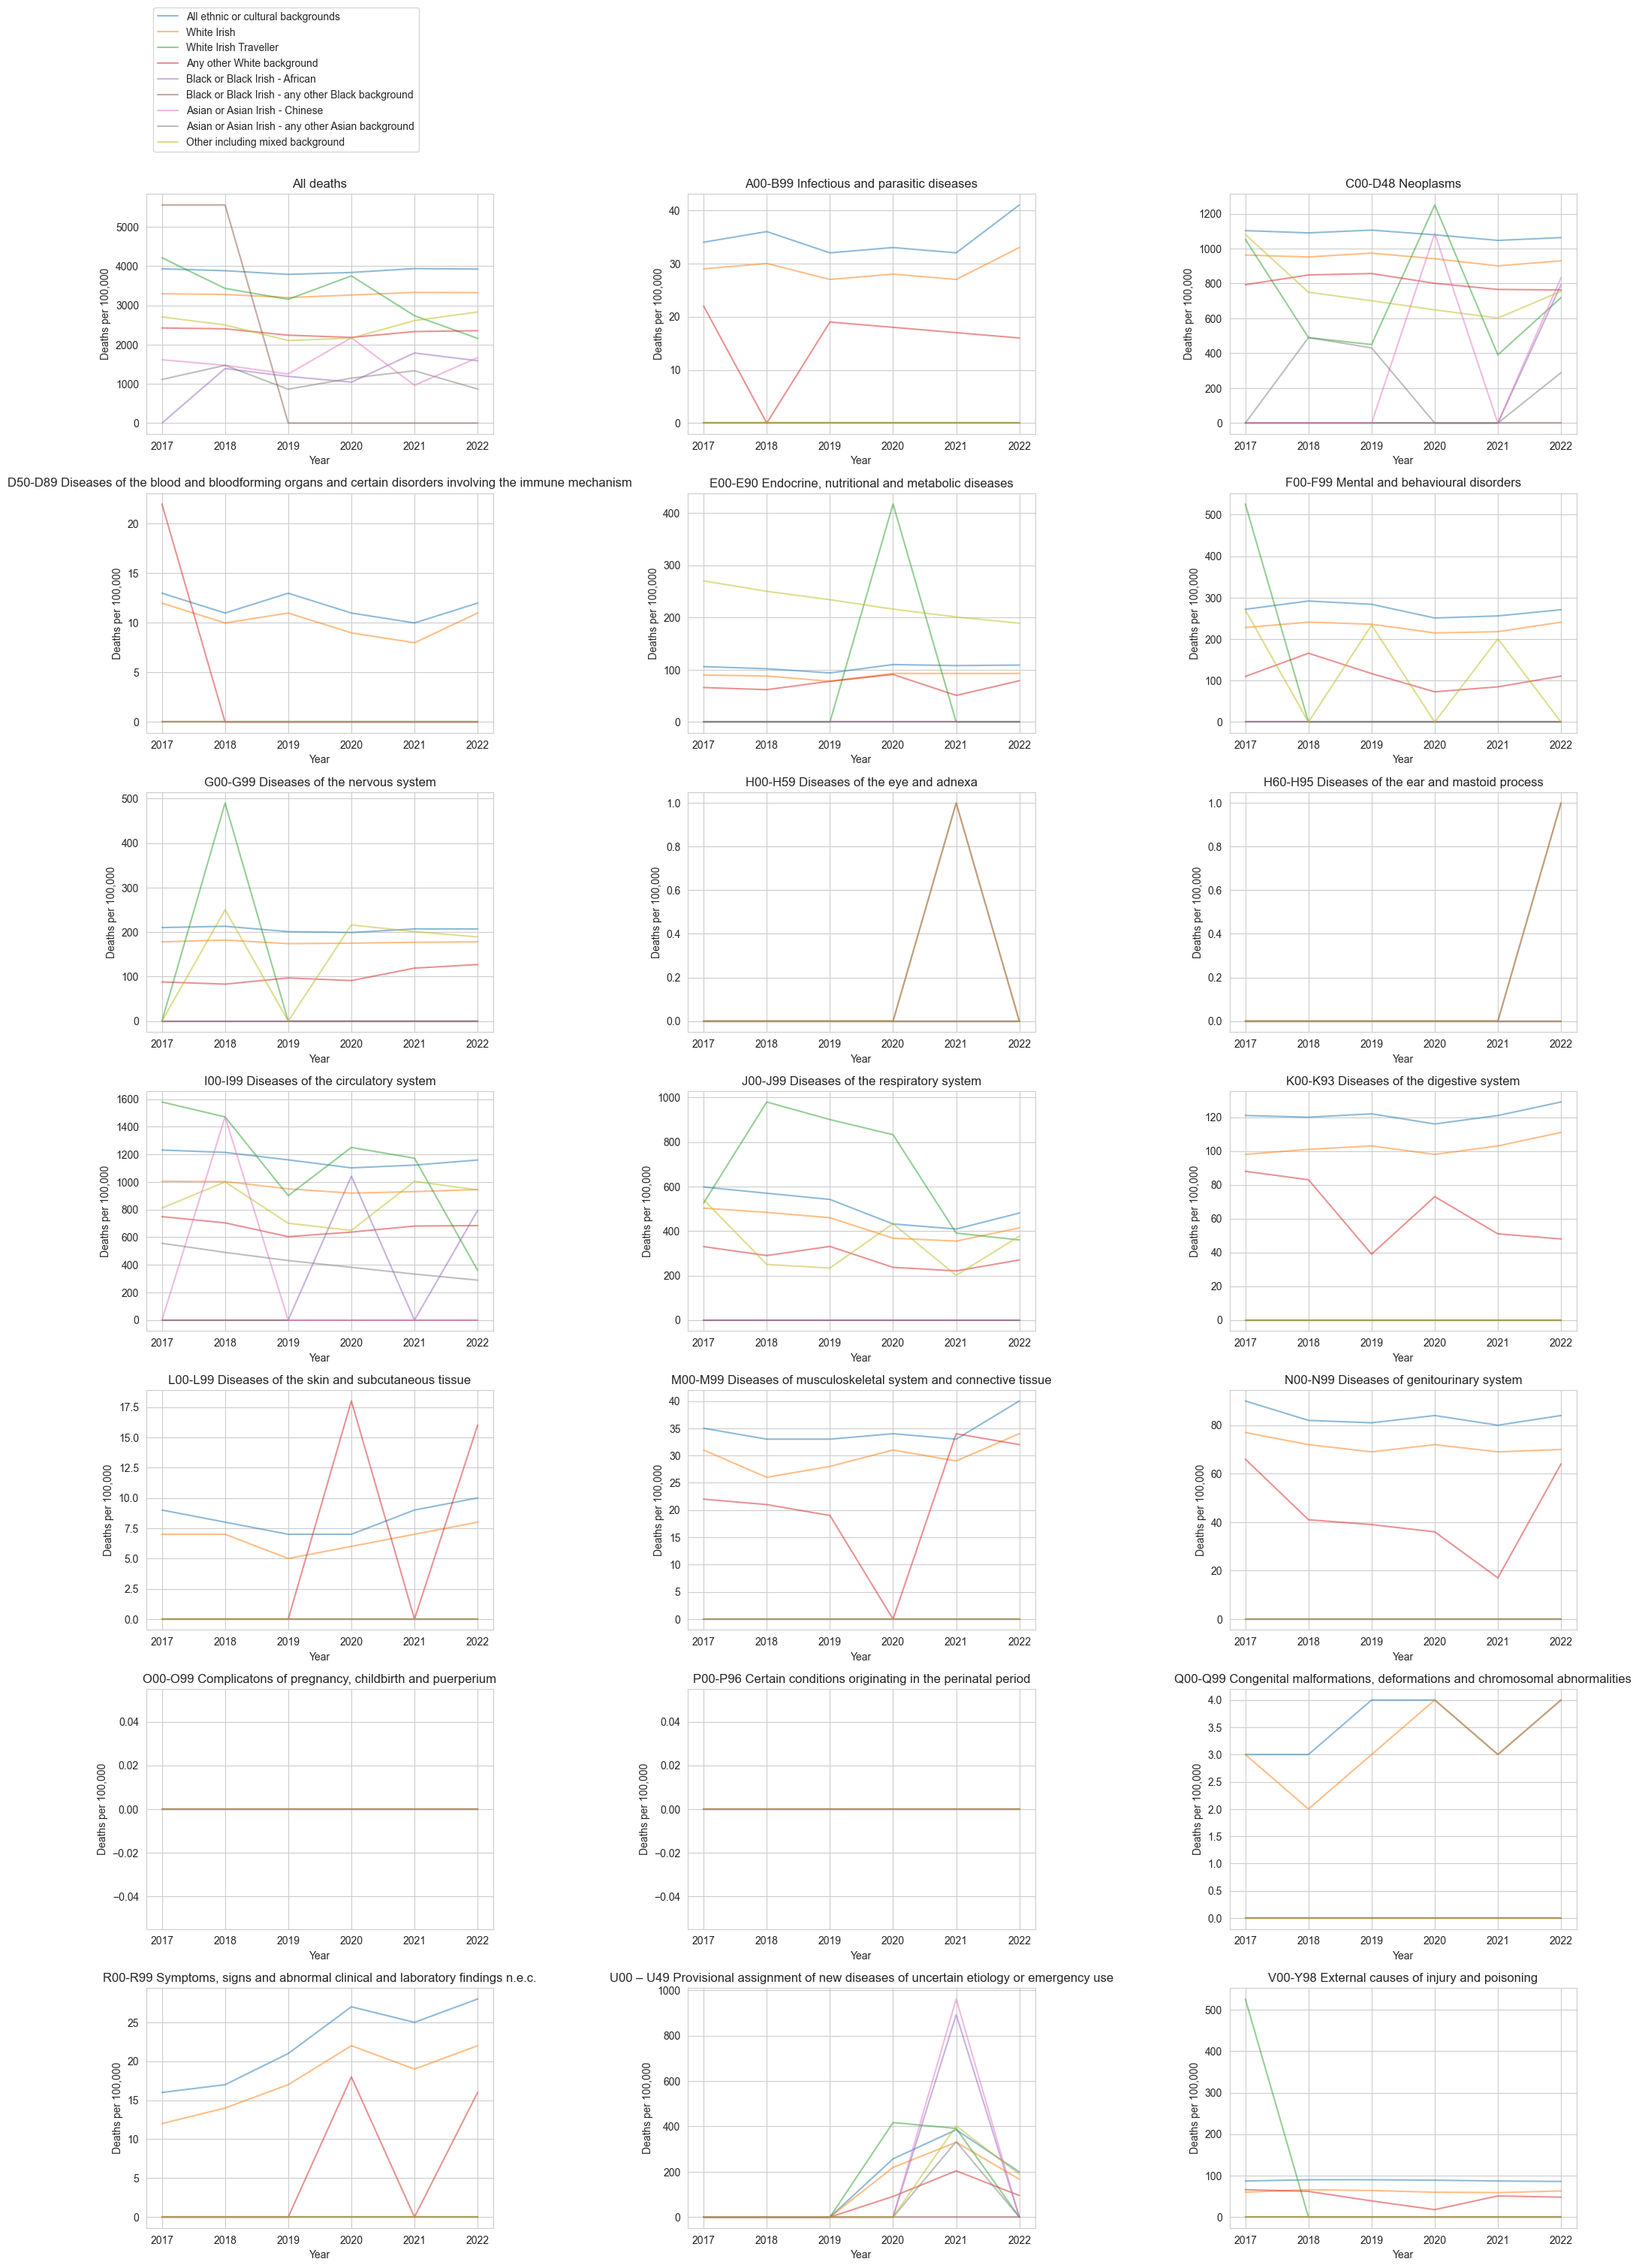

In [35]:
fig, axes = plt.subplots(len(causes_of_death) // 3, 3, figsize=(20, 30))
axes = axes.flatten()

for idx, cause in enumerate(causes_of_death):
    ax = axes[idx]
    
    for index, ethnicity in enumerate(ethnicities):
        ethnicity_df = df[df['Ethnicity'] == ethnicity]
        ethnicity_df_cause = ethnicity_df[ethnicity_df['Cause of Death'] == cause]
        ethnicity_df_age_groups = ethnicity_df_cause[ethnicity_df_cause['Age Group'] == '65 years and over']
        deaths = ethnicity_df_age_groups[years].values.flatten()
        ax.plot(years, deaths, label=ethnicity, alpha=0.5)
    
    ax.set_title(cause)
    ax.set_ylabel('Deaths per 100,000')
    ax.set_xlabel('Year')

print('Comparison of elderly deaths rates per 100,000 people by cause for ethnicities')
axes[0].legend(bbox_to_anchor=(0.8, 1.8))
plt.tight_layout(w_pad=14.0)
plt.show()

#### Plotting average death rates for the years 2017 - 2022 inclusive

Average deaths for years 2017-2022 (inclusive) per 100,000 by cause for ethnicities


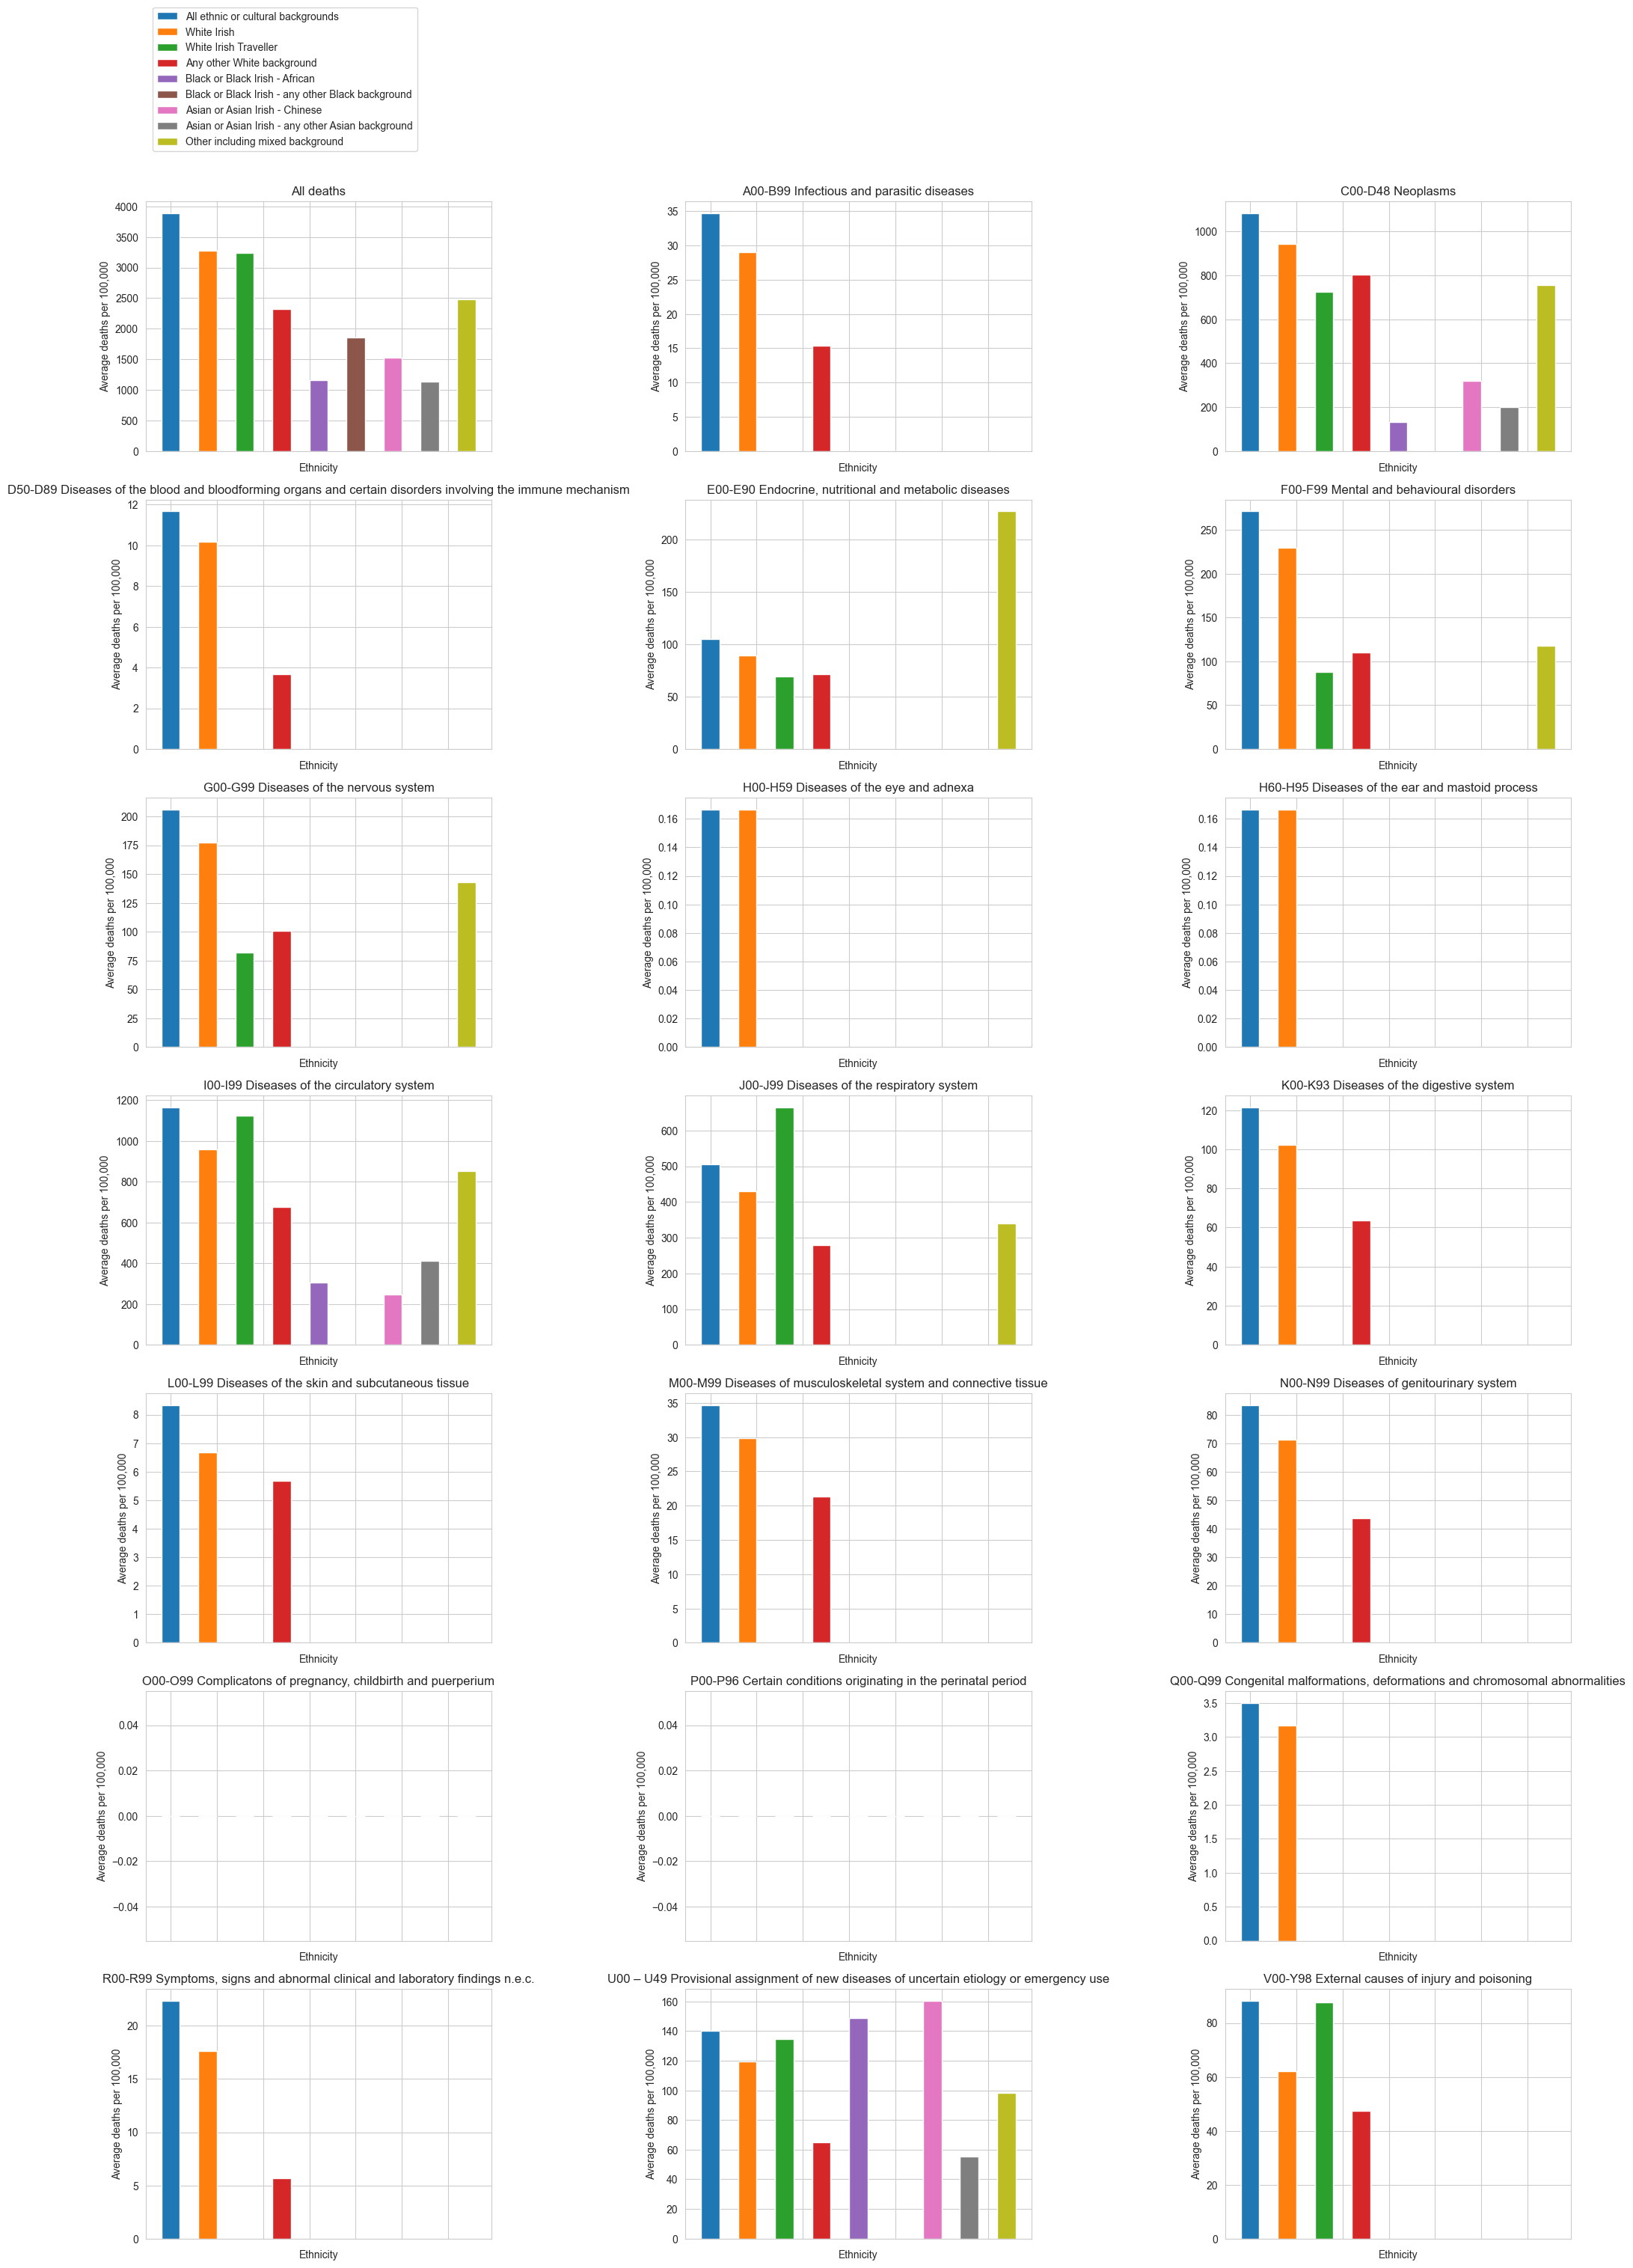

In [36]:
fig, axes = plt.subplots(len(causes_of_death) // 3, 3, figsize=(20, 30))
axes = axes.flatten()

for idx, cause in enumerate(causes_of_death):
    ax = axes[idx]
    bar_width = 1
    x_positions = range(len(ethnicities))
    
    for index, ethnicity in enumerate(ethnicities):
        ethnicity_df = df[df['Ethnicity'] == ethnicity]
        ethnicity_df_cause = ethnicity_df[ethnicity_df['Cause of Death'] == cause]
        ethnicity_df_age_groups = ethnicity_df_cause[ethnicity_df_cause['Age Group'] == '65 years and over']
        deaths = ethnicity_df_age_groups[years].sum(axis=1).sum() / 6
        ax.bar(x_positions[index] + bar_width * index, deaths, width=bar_width, label=ethnicity)
    
    ax.set_title(cause)
    ax.set_ylabel('Average deaths per 100,000')
    ax.set_xlabel('Ethnicity')
    ax.set_xticklabels([])

print('Average deaths for years 2017-2022 (inclusive) per 100,000 by cause for ethnicities')
axes[0].legend(bbox_to_anchor=(0.8, 1.8))
plt.tight_layout(w_pad=14.0)
plt.show()